# F0 detection

In [2]:
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt

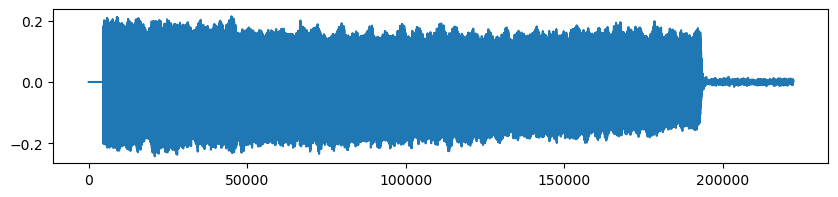

In [3]:
sound = AudioSegment.from_file("data/sahya_g4.m4a")
fps = sound.frame_rate
width = sound.sample_width
sound_range = 2 ** (8*width - 1)
sound = sound.set_channels(1) # ch 1
sound_array = np.array(sound.get_array_of_samples()) / sound_range
plt.figure(figsize=(10,2))
plt.plot(sound_array)
plt.show()

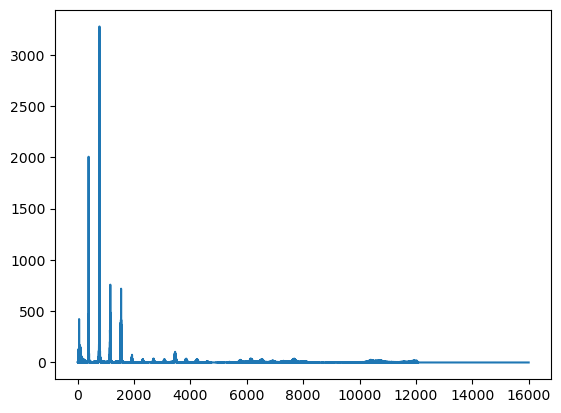

In [33]:
ffted = np.fft.rfft(sound_array)
ffted = np.abs(ffted)
freq_ax = np.fft.rfftfreq(len(sound_array),1/fps)
#freq = np.fft.rfftfreq(1024,1/fps)
plt.plot(freq_ax,ffted)
plt.show()

In [34]:
# g4 391.9954
freqs = freq_ax[np.argsort(ffted)[-20:][::-1]]
print(freqs)
f0 = np.min(freqs)
print("f0 is",f0)

[769.72926267 770.01728111 769.58525346 384.36059908 768.57718894
 769.87327189 767.85714286 768.14516129 768.00115207 770.16129032
 768.28917051 768.43317972 768.86520737 770.30529954 384.21658986
 769.00921659 765.40898618 383.92857143 763.68087558 762.81682028]
f0 is 383.92857142857144


playing 769.7292626728112 Hz.


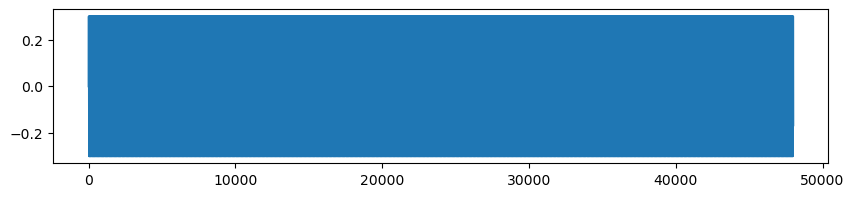

In [36]:
import sounddevice as sd
#f  = f0
f  = freqs[0]
print("playing",f,"Hz.")
duration = 1.5# second
volume = 0.3 # [0,1]
x = np.linspace(0,2*np.pi*f*duration,int(fps*duration))
out = np.sin(x) * volume
plt.figure(figsize=(10,2))
plt.plot(out)
plt.show()
sd.play(out,fps)

In [9]:
def get_f0freq(sound_array:np.ndarray,fps:int,search_range:int = 5) -> float:
    freq_ax=np.fft.rfftfreq(len(sound_array),1/fps)
    ffted = np.abs(np.fft.rfft(sound_array))
    freqs = freq_ax[np.argsort(ffted)[-search_range:]]
    return np.min(freqs)
print("get f0freq return is",get_f0freq(sound_array[50000:51024],fps))

get f0freq return is 375.0


# Pitch shift

In [2]:
import numpy as np
from pydub import  AudioSegment
import matplotlib.pyplot as plt
import torch
import librosa

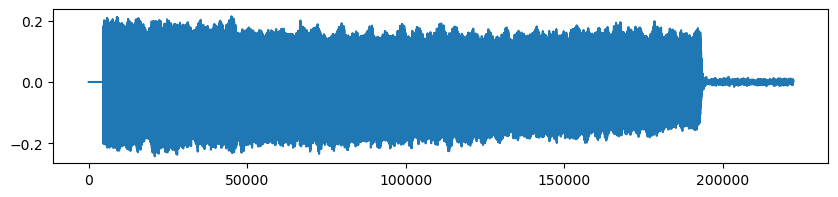

In [3]:
sound = AudioSegment.from_file("data/sahya_g4.m4a")
fps = sound.frame_rate
width = sound.sample_width
sound_range = 2 ** (8*width - 1)
sound = sound.set_channels(1) # ch 1
sound_array = np.array(sound.get_array_of_samples()) / sound_range
#sound_array = torch.from_numpy(sound_array)
plt.figure(figsize=(10,2))
plt.plot(sound_array)
plt.show()

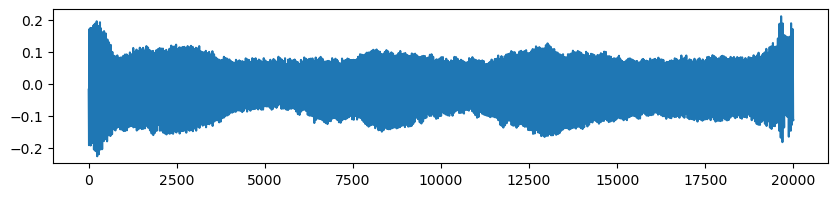

In [26]:
out = librosa.effects.pitch_shift(sound_array[10000:30000],fps,10)
plt.figure(figsize=(10,2))
plt.plot(out)
plt.show()


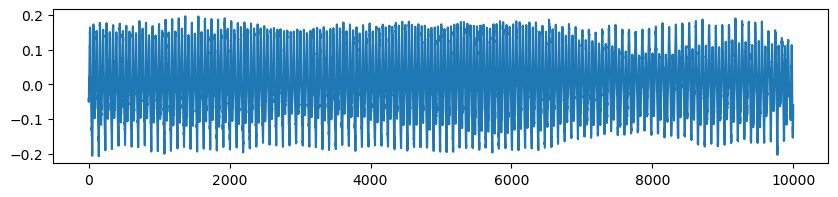

In [34]:
out= pitch_shift(sound_array[40000:50000].view(1,1,-1).float().to("cuda"),-2,fps).cpu().numpy()
plt.figure(figsize=(10,2))
plt.plot(out.reshape(-1))
plt.show()

In [25]:
import sounddevice as sd
sd.play(out.reshape(-1),fps)